# REGRESSION LOGISTIQUE

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import numpy as np

# Charger le fichier CSV
df = pd.read_csv('../DATA/donnée_malades_cardiaques.csv',index_col=0)
df.head()

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_Normal,ECG_au_repos_ST,Pente_ST_Down,Pente_ST_Flat,Pente_ST_Up
0,40,1,140,289,0,172,0,0,0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180,0,156,0,1,1,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283,0,98,0,0,0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214,0,108,1,1,1,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195,0,122,0,0,0,0,0,1,0,0,1,0,0,0,1


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 917 entries, 0 to 917
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Âge                             917 non-null    int64
 1   Sexe                            917 non-null    int64
 2   Tension_aurepos                 917 non-null    int64
 3   Cholestérol                     917 non-null    int64
 4   Glycémieà_jeun                  917 non-null    int64
 5   Fréquence_cardiaque_max         917 non-null    int64
 6   Angine_d_effort                 917 non-null    int64
 7   Dépression_ST                   917 non-null    int64
 8   Maladie_cardiaque               917 non-null    int64
 9   Type_de_douleur_thoracique_ASY  917 non-null    int64
 10  Type_de_douleur_thoracique_ATA  917 non-null    int64
 11  Type_de_douleur_thoracique_NAP  917 non-null    int64
 12  Type_de_douleur_thoracique_TA   917 non-null    int64
 13  ECG_au_rep

In [152]:
display(df.describe())

,Âge,Sexe,Tension_aurepos,Cholestérol,Glycémieà_jeun,Fréquence_cardiaque_max,Angine_d_effort,Dépression_ST,Maladie_cardiaque,Type_de_douleur_thoracique_ASY,Type_de_douleur_thoracique_ATA,Type_de_douleur_thoracique_NAP,Type_de_douleur_thoracique_TA,ECG_au_repos_LVH,ECG_au_repos_Normal,ECG_au_repos_ST,Pente_ST_Down,Pente_ST_Flat,Pente_ST_Up
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,0.789531,132.540894,243.211559,0.233370,136.789531,0.404580,0.719738,0.552890,0.540894,0.188659,0.220284,0.050164,0.205016,0.600872,0.194111,0.068702,0.500545,0.430752
std,9.437636,0.407864,17.999749,53.430044,0.423206,25.467129,0.491078,0.990662,0.497466,0.498597,0.391451,0.414664,0.218401,0.403934,0.489986,0.395731,0.253085,0.500273,0.495452
min,28.000000,0.000000,80.000000,85.000000,0.000000,60.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,237.000000,0.000000,138.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


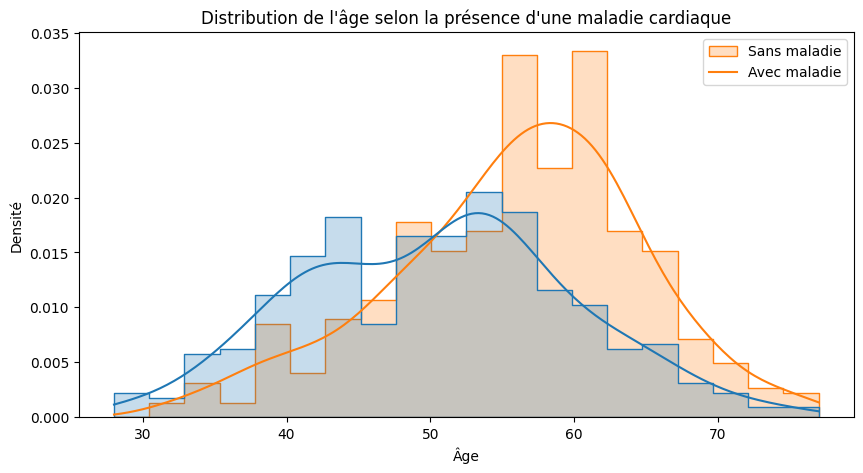

In [153]:
plt.figure(figsize=(10, 5))
sns.histplot(df, x="Âge", hue="Maladie_cardiaque", bins=20, kde=True, element="step", stat="density")
plt.title("Distribution de l'âge selon la présence d'une maladie cardiaque")
plt.xlabel("Âge")
plt.ylabel("Densité")
plt.legend(["Sans maladie", "Avec maladie"])
plt.show()

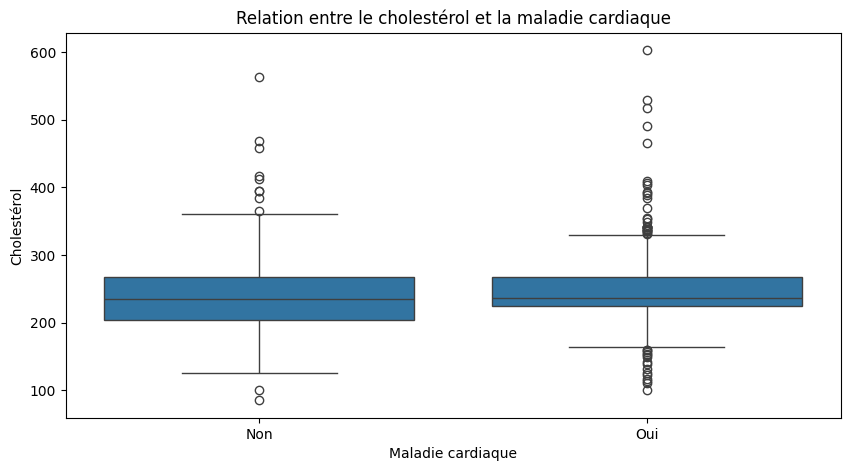

In [154]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Maladie_cardiaque", y="Cholestérol", data=df)
plt.title("Relation entre le cholestérol et la maladie cardiaque")
plt.xlabel("Maladie cardiaque")
plt.ylabel("Cholestérol")
plt.xticks([0, 1], ["Non", "Oui"])
plt.show()


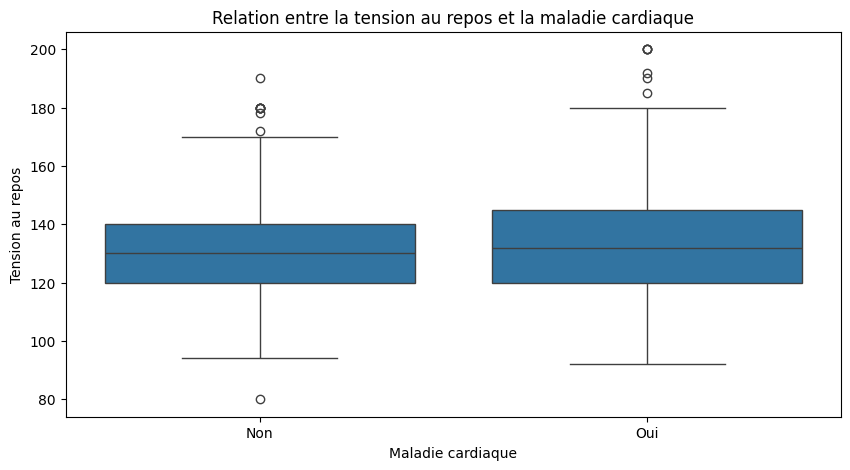

In [155]:
plt.figure(figsize=(10, 5))
sns.boxplot(x="Maladie_cardiaque", y="Tension_aurepos", data=df)
plt.title("Relation entre la tension au repos et la maladie cardiaque")
plt.xlabel("Maladie cardiaque")
plt.ylabel("Tension au repos")
plt.xticks([0, 1], ["Non", "Oui"])
plt.show()

In [156]:
# Préparation des données
X = df.drop(columns=["Maladie_cardiaque"])
y = df["Maladie_cardiaque"]

# Séparation en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [157]:
# Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, zero_division=0) * 100
print(f"Taux de réussite du modèle : {accuracy:.2f}%")
print(f"Précision du modèle : {precision:.2f}%")
print(f"Classes réelles dans y_test : {np.unique(y_test)}")
print(f"Classes prédites dans y_pred : {np.unique(y_pred)}")
from sklearn.metrics import recall_score, f1_score
recall = recall_score(y_test, y_pred, zero_division=0) * 100
f1 = f1_score(y_test, y_pred, zero_division=0) * 100

print(f"Rappel du modèle : {recall:.2f}%")
print(f"F1-Score du modèle : {f1:.2f}%")
print("Rapport de classification :")
print(classification_report(y_test, y_pred))

Taux de réussite du modèle : 87.50%
Précision du modèle : 92.38%
Classes réelles dans y_test : [0 1]
Classes prédites dans y_pred : [0 1]
Rappel du modèle : 86.61%
F1-Score du modèle : 89.40%
Rapport de classification :
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        72
           1       0.92      0.87      0.89       112

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



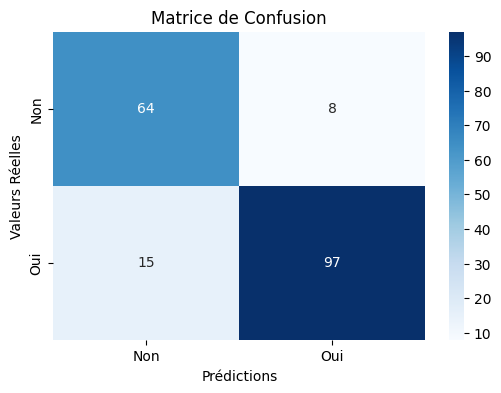

In [158]:
# Matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Non", "Oui"], yticklabels=["Non", "Oui"])
plt.xlabel("Prédictions")
plt.ylabel("Valeurs Réelles")
plt.title("Matrice de Confusion")
plt.show()

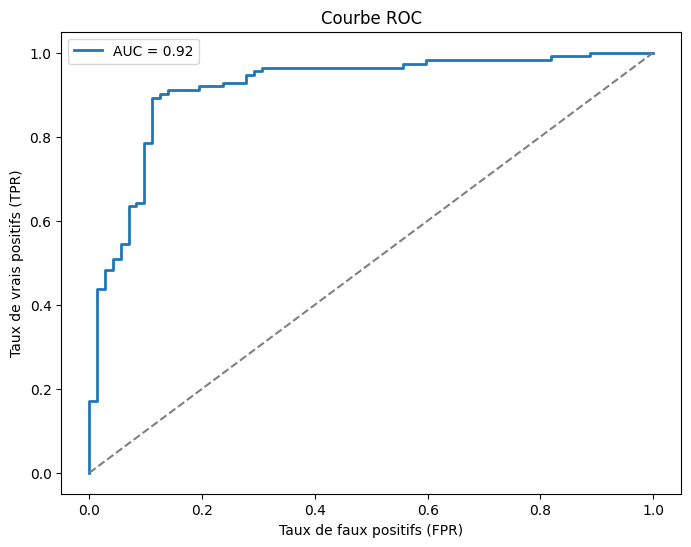

In [159]:
# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.show()

In [160]:
# Explication des métriques
print("\nSignification des métriques :")
print(f"- Taux de réussite : {accuracy:.2f}% indique combien de prédictions sont correctes sur l'ensemble de test.")
print(f"- Précision : {precision:.2f}% indique la proportion de prédictions positives correctes parmi toutes les prédictions positives.")
print("- Matrice de confusion montre les vrais positifs, vrais négatifs, faux positifs et faux négatifs.")
print("- Courbe ROC et AUC mesurent la capacité du modèle à distinguer les classes (plus AUC est proche de 1, meilleur est le modèle).")


Signification des métriques :
- Taux de réussite : 87.50% indique combien de prédictions sont correctes sur l'ensemble de test.
- Précision : 92.38% indique la proportion de prédictions positives correctes parmi toutes les prédictions positives.
- Matrice de confusion montre les vrais positifs, vrais négatifs, faux positifs et faux négatifs.
- Courbe ROC et AUC mesurent la capacité du modèle à distinguer les classes (plus AUC est proche de 1, meilleur est le modèle).
